In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Directories and path variables:
repo_dir = os.getcwd()  # Directory of the notebook
data_file_path = os.path.join(repo_dir, 'long_data')

# List of state abbrevations for iteration:
states = ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI',
          'IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN',
          'MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH',
          'OL','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA',
          'WI','WV','WY']

In [4]:
# Read in XL data:
df = pd.read_excel(f"{data_file_path}.xlsx").drop(columns=['Unnamed: 0', 'treat', 'time_to_treat', 'policy_yr'])
df

,year,state,ren_nrg,state_nm,co2_em,exp_per_cap,population,hdd,cdd,state_gdp
0,1997,1,15583,AK,134.133290,3706.5,613,9956,15,42211
1,1998,1,13638,AK,133.524213,3173.9,620,10527,10,41096
2,1999,1,10605,AK,135.835298,3508.8,625,11591,19,40591
3,2000,1,12375,AK,142.298577,4525.1,628,10363,4,39407
4,2001,1,17446,AK,133.321950,4395.0,634,10598,5,40959
...,...,...,...,...,...,...,...,...,...,...
1270,2017,51,59425,WY,62.796996,7598.5,580,7903,289,37522
1271,2018,51,54920,WY,63.846521,8569.7,579,8180,278,38080
1272,2019,51,57094,WY,59.097402,8092.7,580,8915,243,38447
1273,2020,51,68407,WY,55.626761,6702.7,578,8079,352,36269


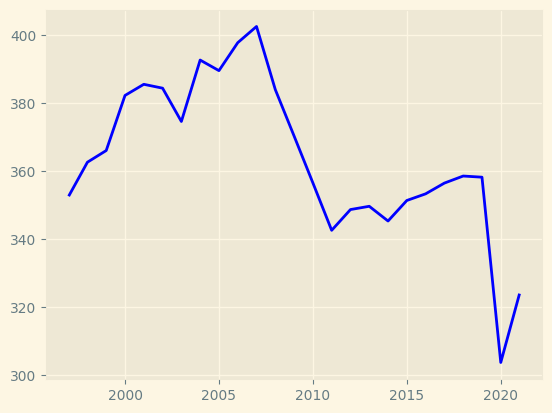

In [21]:
# Slice:
ca_df = df[df['state_nm'] == 'CA']

# Plot:
plt.style.use('Solarize_Light2')
plt.plot(ca_df['year'], ca_df['co2_em'], color='blue')
# plt.plot(ca_df['year'], ca_df['ren_nrg'], color='red')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


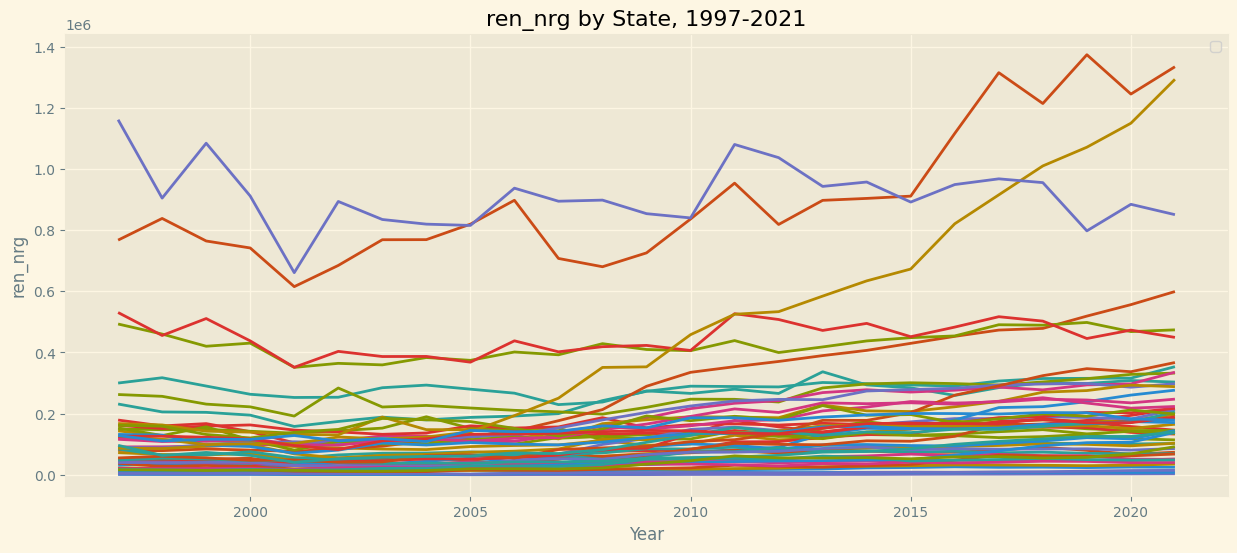

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


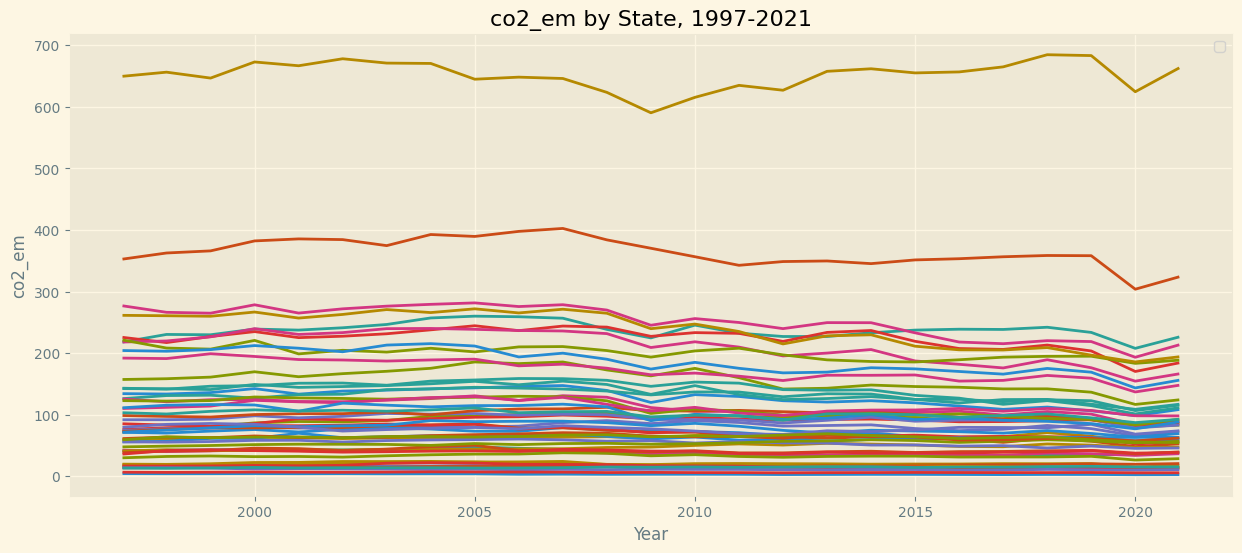

KeyError: 'price'

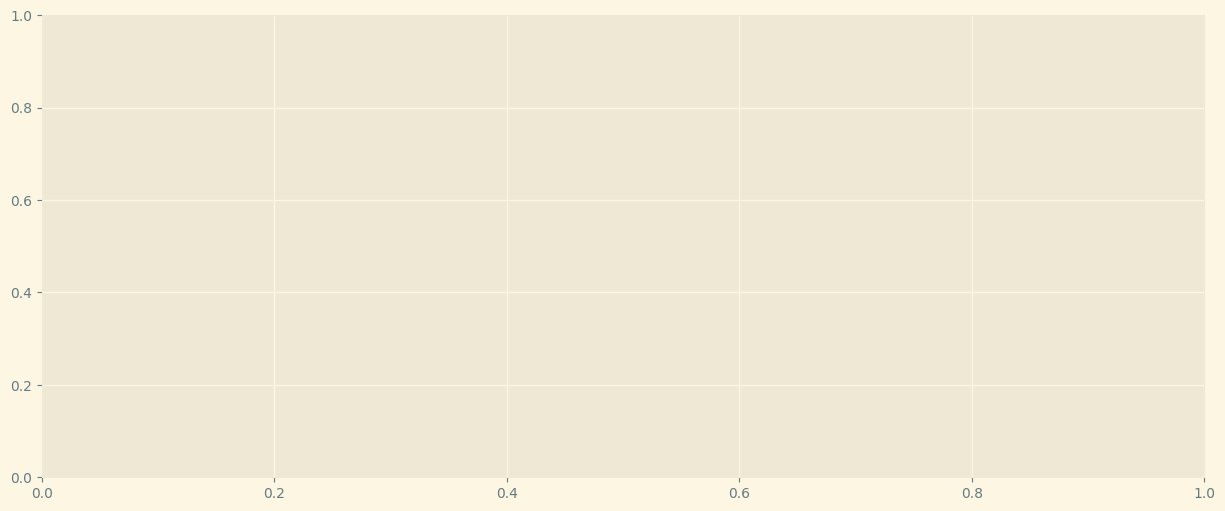

In [7]:
# Function that iterates over the states list and plots series:
def plot_outcomes(df, outcome):
    # Create a list of state-level dfs:
    state_dfs = [df[df['state_nm'] == state] for state in states]
    
    # Print the Arkansas dataframe to check it worked
    # print(state_dfs[0])

    # Iterate over the list and plot layered state-level time series:
    plt.style.use('Solarize_Light2')
    fig, ax = plt.subplots(figsize=(15,6))
    for state_df in state_dfs:
        state_df = state_df.set_index('year')
        ax.plot(state_df.index, state_df[outcome])
    plt.title(f'{outcome} by State, 1997-2021')
    plt.xlabel('Year')
    plt.ylabel(f'{outcome}')
    plt.legend()
    plt.show()

# Call plot_outcomes function for each of the three outcome variables:
outcomes = ['ren_nrg', 'co2_em', 'price']
for x in outcomes:
    plot_outcomes(df, outcome=x)